In [30]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

from parse_dataset import parse_data

os.chdir("/Users/enrico.t/code/ml-reference-implementations")
df = parse_data('data/babI/tasks_1-20_v1-2/en/qa1_single-supporting-fact_train.txt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
fact1       1000 non-null object
fact2       1000 non-null object
question    1000 non-null object
answer      1000 non-null object
dtypes: object(4)
memory usage: 31.3+ KB


In [28]:
df.head()

,fact1,fact2,question,answer
0,Mary moved to the bathroom.,John went to the hallway.,Where is Mary?,bathroom
1,Daniel went back to the hallway.,Sandra moved to the garden.,Where is Daniel?,hallway
2,John moved to the office.,Sandra journeyed to the bathroom.,Where is Daniel?,hallway
3,Mary moved to the hallway.,Daniel travelled to the office.,Where is Daniel?,office
4,John went back to the garden.,John moved to the bedroom.,Where is Sandra?,bathroom


In [27]:
df.describe()

,fact1,fact2,question,answer
count,1000,1000,1000,1000
unique,120,120,4,6
top,Daniel went to the bedroom.,Sandra went to the office.,Where is Mary?,garden
freq,17,15,257,177


In [31]:
df.groupby('answer').describe()

fact1                                             fact2         \
         count unique                             top freq count unique   
answer                                                                    
bathroom   154     81     Mary moved to the bathroom.    6   154     70   
bedroom    155     82  Mary went back to the bedroom.    6   155     74   
garden     177     85   John journeyed to the garden.    7   177     80   
hallway    175     81       John went to the hallway.    6   175     72   
kitchen    173     91  Mary went back to the kitchen.    7   173     69   
office     166     85        Mary went to the office.    6   166     69   

                                                 question         \
                                        top freq    count unique   
answer                                                             
bathroom  Sandra travelled to the bathroom.    8      154      4   
bedroom          Mary moved to the bedroom.    9      155      4   
garden        John travelled to the garden.    8      177      4   
hallway         Sandra went to the hallway.    8      175      4   
kitchen         Sandra went to the kitchen.    9      173      4   
office           Sandra went to the office.   13      166      4   

                                  
                        top freq  
answer                            
bathroom  Where is Sandra?    42  
bedroom     Where is Mary?    44  
garden      Where is Mary?    50  
hallway     Where is Mary?    50  
kitchen     Where is John?    52  
office      Where is John?    46

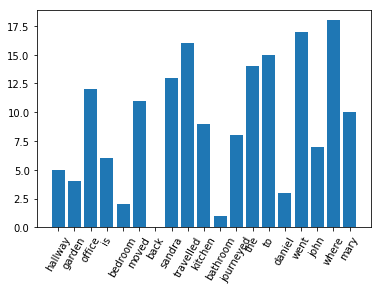

In [19]:
# what are the most common occuring words in the training set?
from itertools import chain

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

all_text = df['fact1'].tolist() + df['fact2'].tolist() + df['question'].tolist() + df['answer'].tolist()
vectorizer.fit(all_text)

plt.bar(vectorizer.vocabulary_.keys(), vectorizer.vocabulary_.values())
plt.xticks(rotation=60)
plt.show()

In [41]:
# how many different words feature in the training set?
print len(vectorizer.vocabulary_)
print vectorizer.vocabulary_.keys()

19
[u'hallway', u'garden', u'office', u'is', u'bedroom', u'moved', u'back', u'sandra', u'travelled', u'kitchen', u'bathroom', u'journeyed', u'the', u'to', u'daniel', u'went', u'john', u'where', u'mary']


In [42]:
df['question_length'] = df['question'].apply(len)
df['answer_length'] = df['answer'].apply(len)
df['fact1_length'] = df['fact1'].apply(len)
df['fact2_length'] = df['fact2'].apply(len)
df.head()

,fact1,fact2,question,answer,question_length,answer_length,fact1_length,fact2_length,fact_length
0,Mary moved to the bathroom.,John went to the hallway.,Where is Mary?,bathroom,15,8,27,25,NaN
1,Daniel went back to the hallway.,Sandra moved to the garden.,Where is Daniel?,hallway,17,7,32,27,NaN
2,John moved to the office.,Sandra journeyed to the bathroom.,Where is Daniel?,hallway,17,7,25,33,NaN
3,Mary moved to the hallway.,Daniel travelled to the office.,Where is Daniel?,office,17,6,26,31,NaN
4,John went back to the garden.,John moved to the bedroom.,Where is Sandra?,bathroom,17,8,29,26,NaN


In [45]:
df['question'].describe()

count                1000
unique                  4
top       Where is Mary? 
freq                  257
Name: question, dtype: object

In [33]:
df['answer'].describe()

count       1000
unique         6
top       garden
freq         177
Name: answer, dtype: object

In [34]:
df['fact1'].describe()

count                            1000
unique                            120
top       Daniel went to the bedroom.
freq                               17
Name: fact1, dtype: object

In [46]:
df['fact1_length'].describe()

count    1000.000000
mean       29.032000
std         2.579463
min        24.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        33.000000
Name: fact1_length, dtype: float64

In [47]:
df['fact2_length'].describe()

count    1000.000000
mean       28.999000
std         2.541153
min        24.000000
25%        27.000000
50%        29.000000
75%        31.000000
max        33.000000
Name: fact2_length, dtype: float64